### 이미지 전처리,OpenCV

In [1]:
# %autosave 0
import warnings
warnings.filterwarnings(action='ignore')

import os
import time

import cv2
# cv2.__version__
import numpy as np
import pandas as pd
import seaborn as sb

from tensorflow.keras.models import Sequential  # class
from tensorflow.keras.models import load_model  # model 사용
from tensorflow.keras.layers import Dense       # 전결합
from tensorflow.keras.layers import Dropout     # 특정 node를 사용안함.
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

from tensorflow.keras.callbacks import EarlyStopping   # 학습 자동 중지
from tensorflow.keras.callbacks import ModelCheckpoint # 우수한 학습 모델 파일 저장
from tensorflow.keras import regularizers 
from tensorflow.keras.utils import to_categorical   # one-hot 엔코딩

from tensorflow.keras.datasets import mnist

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split # 학습셋과 테스트셋의 분리 지원
from sklearn.model_selection import StratifiedKFold  # K겹 교차 검증

from PIL import Image

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)           # 맑은 고딕 폰트 지정
plt.rcParams["font.size"] = 12         # 글자 크기
# plt.rcParams["figure.figsize"] = (10, 4) # 10:4의 그래프 비율
plt.rcParams['axes.unicode_minus'] = False  # minus 부호는 unicode 적용시 한글이 깨짐으로 설정

%matplotlib inline

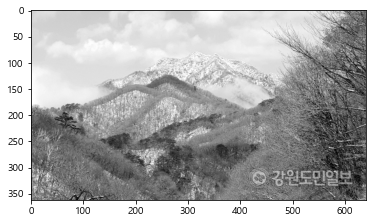

In [3]:
# 흑백으로 이미지를 읽기
image = cv2.imread("./testcv01.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap="gray")  # 이미지 출력
plt.axis("on") # off: 축을 출력하지 말것
plt.show()     # 이미지 출력

In [7]:
print(type(image))
print(image.shape)
print(image[0])

<class 'numpy.ndarray'>
(362, 640)
[211 215 213 212 215 215 213 214 211 214 220 222 221 221 221 221 220 220
 220 221 219 221 221 221 220 223 224 223 225 225 223 224 223 223 222 222
 222 222 223 223 220 221 222 223 223 222 221 220 217 216 214 213 210 211
 211 211 207 206 210 210 207 207 208 210 206 206 209 209 210 208 209 209
 207 207 209 208 211 210 211 211 206 206 208 208 208 208 209 210 209 208
 211 212 210 210 210 210 205 203 203 204 204 204 205 205 202 202 203 202
 202 202 204 205 200 201 202 201 202 203 202 204 201 201 203 203 203 203
 202 201 201 201 201 202 204 203 203 204 200 201 203 202 202 202 203 203
 202 203 203 202 204 205 205 204 203 208 222 229 232 232 233 233 229 228
 230 232 231 230 232 230 226 225 227 227 229 228 230 230 226 226 227 226
 223 222 221 216 211 211 212 213 213 213 213 213 210 212 213 214 218 220
 222 224 225 227 227 227 224 221 224 223 220 220 228 231 231 230 232 233
 229 230 232 235 236 238 238 236 232 232 233 233 233 233 233 233 230 230
 233 233 234 234

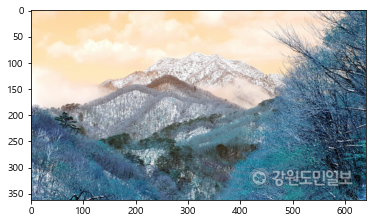

In [8]:
image = cv2.imread("./testcv01.jpg", cv2.IMREAD_COLOR)
plt.imshow(image)  # 이미지 출력
plt.axis("on") # off: 축을 출력하지 말것
plt.show()     # 이미지 출력

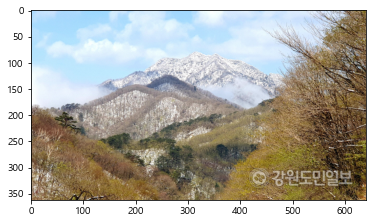

In [10]:
image_bgr = cv2.imread("./testcv01.jpg", cv2.IMREAD_COLOR)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB) # BGR -> RGB
plt.imshow(image_rgb)  # 이미지 출력
plt.axis("on") # off: 축을 출력하지 말것
plt.show()     # 이미지 출력

In [14]:
print(type(image))
print(image.shape)    # (362, 640, 3)
print(image[0].shape) # (640, 3)
print(image[0])

<class 'numpy.ndarray'>
(362, 640, 3)
(640, 3)
[[250 223 173]
 [250 226 180]
 [254 222 179]
 ...
 [ 50  91 113]
 [103 145 168]
 [112 152 171]]


In [16]:
# 파일 목록 출력
path = "./train"
file_list = os.listdir(path)

print ("file_list: {}".format(file_list))

file_list: ['0.jpg', '1.jpg', '105.jpg', '108.jpg', '11.jpg', '115.jpg', '117.jpg', '120.jpg', '125.jpg', '127.jpg', '133.jpg', '135.jpg', '140.jpg', '145.jpg', '147.jpg', '15.jpg', '155.jpg', '159.jpg', '165.jpg', '17.jpg', '170.jpg', '175.jpg', '182.jpg', '185.jpg', '190.jpg', '193.jpg', '195.jpg', '20.jpg', '205.jpg', '215.jpg', '22.jpg', '220.jpg', '223.jpg', '225.jpg', '23.jpg', '235.jpg', '240.jpg', '245.jpg', '247.jpg', '25.jpg', '250.jpg', '253.jpg', '255.jpg', '29.jpg', '3.jpg', '32.jpg', '35.jpg', '37.jpg', '40.jpg', '43.jpg', '45.jpg', '48.jpg', '5.jpg', '55.jpg', '57.jpg', '6.jpg', '62.jpg', '65.jpg', '7.jpg', '70.jpg', '71.jpg', '75.jpg', '77.jpg', '83.jpg', '85.jpg', '9.jpg', '90.jpg', '93.jpg', '95.jpg', '97.jpg']


In [17]:
# 파일명과 확장자의 분리
y_train = []
for i in range(len(file_list)):
    spt = os.path.splitext(file_list[i])
    # print(spt) # ('0', '.jpg')
    y_train.append(int(spt[0])) # 파일명을 값으로 사용   
    
print(y_train)

[0, 1, 105, 108, 11, 115, 117, 120, 125, 127, 133, 135, 140, 145, 147, 15, 155, 159, 165, 17, 170, 175, 182, 185, 190, 193, 195, 20, 205, 215, 22, 220, 223, 225, 23, 235, 240, 245, 247, 25, 250, 253, 255, 29, 3, 32, 35, 37, 40, 43, 45, 48, 5, 55, 57, 6, 62, 65, 7, 70, 71, 75, 77, 83, 85, 9, 90, 93, 95, 97]


In [18]:
image_bgr = cv2.imread("./train/0.jpg", cv2.IMREAD_COLOR)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
print(type(image_rgb))
print(image_rgb.shape)
print(image_rgb)

<class 'numpy.ndarray'>
(128, 128, 3)
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


In [19]:
image_rgb2 = 255-image_rgb  # 흰색: 255 255 255 -> 0 0 0
print(image_rgb2)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
